In [ ]:
import os
import requests

# Get PDF document path
pdf_path = "humira (1).pdf"

# Download PDF
if not os.path.exists(pdf_path):
    print("[INFO] File doesn't exist, downloading...")

    # Enter the URL of the PDF
    url = "https://www.rxabbvie.com/pdf/humira.pdf"

    # The local filename to save the downloaded file
    filename = pdf_path

    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Open the file and save it
        with open(filename, "wb") as file:
            file.write(response.content)
        print(f"[INFO] The file has been download and saved as {filename}")
    else:
        print(f"[INFO] Failed to download the file. Status code: {reponse.status_code}")

else:
    print(f"File {pdf_path} exists.")

File humira (1).pdf exists.


In [ ]:
!pip install pymupdf
import os
import requests
from tqdm.auto import tqdm
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import spacy
import json
import fitz


# Download necessary resources
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('punkt_tab') # Download the 'punkt_tab' data package

# Initialize tools
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))
nlp = spacy.load("en_core_web_sm")

def text_formatter(text: str) -> str:
    """Clean and format text."""
    return text.replace("\n", " ").strip()

def preprocess_text(text: str) -> dict:
    """Perform NLP preprocessing."""
    sentences = sent_tokenize(text)
    processed_sentences = []

    for sentence in sentences:
        words = word_tokenize(sentence)
        filtered_words = [word for word in words if word.lower() not in stop_words]
        lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
        stemmed_words = [stemmer.stem(word) for word in lemmatized_words]
        doc = nlp(" ".join(stemmed_words))
        dependencies = [(token.text, token.dep_) for token in doc]

        processed_sentences.append({
            "original_sentence": sentence,
            "tokens": filtered_words,
            "lemmatized": lemmatized_words,
            "stemmed": stemmed_words,
            "dependencies": dependencies,
        })

    return {"sentences": processed_sentences, "text": text}

# Download PDF if not exists
pdf_path = "humira.pdf"
url = "https://www.rxabbvie.com/pdf/humira.pdf"

if not os.path.exists(pdf_path):
    print("[INFO] Downloading PDF...")
    response = requests.get(url)
    if response.status_code == 200:
        with open(pdf_path, "wb") as file:
            file.write(response.content)
        print("[INFO] PDF downloaded successfully.")
    else:
        raise Exception(f"Failed to download PDF. Status code: {response.status_code}")

# import fitz #This line is already present at the top of the file. Removing the duplicate import
from tqdm import tqdm

def open_and_read_pdf(pdf_path: str) -> list[dict]:
    """Read and preprocess PDF text with metadata."""
    try:
        doc = fitz.open(pdf_path)  # Open the PDF
    except Exception as e:
        print(f"Error opening PDF: {e}")
        return []

    pages_and_texts = []

    for page_number, page in tqdm(enumerate(doc, start=1), desc="Processing PDF"):
        text = page.get_text() or ""  # Get text or set to empty if none exists
        processed_text = preprocess_text(text) if text else ""

        pages_and_texts.append({
            "page_number": page_number,
            "text": text,
            "processed_text": processed_text,
            "page_char_count": len(text),
            "page_word_count": len(text.split()),
        })

    return pages_and_texts

# Ensure `pdf_path` is defined
# pdf_

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
import pandas as pd
import fitz # Import fitz here

# ... (include the open_and_read_pdf function here)

# Call the function and assign the result to pages_and_texts
pdf_path = "humira (1).pdf"  # Make sure this path is correct
pages_and_texts = open_and_read_pdf(pdf_path)

# Now create the DataFrame
df = pd.DataFrame(pages_and_texts)
df.head()

Processing PDF: 111it [00:23,  4.68it/s]


,page_number,text,processed_text,page_char_count,page_word_count
0,1,HIGHLIGHTS OF PRESCRIBING INFORMATION \nThese ...,{'sentences': [{'original_sentence': 'HIGHLIGH...,6260,1017
1,2,\n WARNINGS AND PRECAUTIONS \n• Serious inf...,{'sentences': [{'original_sentence': ' WARN...,3879,503
2,3,FULL PRESCRIBING INFORMATION \nWARNING: SERIOU...,{'sentences': [{'original_sentence': 'FULL PRE...,2712,377
3,4,blocker in combination with these other immuno...,{'sentences': [{'original_sentence': 'blocker ...,2053,291
4,5,will be closely monitored and have regular fol...,{'sentences': [{'original_sentence': 'will be ...,2176,340


In [ ]:
df.describe().round(2)

,page_number,page_char_count,page_word_count
count,111.00,111.00,111.00
mean,56.00,1964.23,310.74
std,32.19,1139.53,173.75
min,1.00,150.00,26.00
25%,28.50,1072.50,184.50
50%,56.00,1957.00,291.00
75%,83.50,2889.00,454.00
max,111.00,6260.00,1017.00


In [ ]:
from spacy.lang.en import English

nlp = English()

# Add a sentencizer pipeline, see https://spacy.io/api/sentencizer
nlp.add_pipe("sentencizer")

# Create document instance as an example
doc = nlp("This is a sentence. This another sentence. I like elephants.")
assert len(list(doc.sents)) == 3

# Print out our sentences split
list(doc.sents)

[This is a sentence., This another sentence., I like elephants.]

In [ ]:
pages_and_texts[100]

{'page_number': 101,
 'text': 'Figure H \n \nInject HUMIRA \n12. Using a quick, dart-like motion, insert the needle into the squeezed skin at about a 45-\ndegree angle. See Figure I.  \n',
 'processed_text': {'sentences': [{'original_sentence': 'Figure H \n \nInject HUMIRA \n12.',
    'tokens': ['Figure', 'H', 'Inject', 'HUMIRA', '12', '.'],
    'lemmatized': ['Figure', 'H', 'Inject', 'HUMIRA', '12', '.'],
    'stemmed': ['figur', 'h', 'inject', 'humira', '12', '.'],
    'dependencies': [('figur', 'compound'),
     ('h', 'compound'),
     ('inject', 'compound'),
     ('humira', 'ROOT'),
     ('12', 'nummod'),
     ('.', 'punct')]},
   {'original_sentence': 'Using a quick, dart-like motion, insert the needle into the squeezed skin at about a 45-\ndegree angle.',
    'tokens': ['Using',
     'quick',
     ',',
     'dart-like',
     'motion',
     ',',
     'insert',
     'needle',
     'squeezed',
     'skin',
     '45-',
     'degree',
     'angle',
     '.'],
    'lemmatized': ['Using

In [ ]:
for item in tqdm(pages_and_texts):
    item["sentences"] = list(nlp(item["text"]).sents)

    # Make sure all sentences are strings (the default type is a spaCy datatype)
    item["sentences"] = [str(sentence) for sentence in item["sentences"]]

    # Count the sentences
    item["page_sentence_count_spacy"] = len(item["sentences"])
    print(item)

 11%|█         | 12/111 [00:00<00:01, 51.76it/s]

{'page_number': 1, 'text': "HIGHLIGHTS OF PRESCRIBING INFORMATION \nThese highlights do not include all the information needed to use \nHUMIRA safely and effectively. See full prescribing information for \nHUMIRA. \n \nHUMIRA® (adalimumab) injection, for subcutaneous use \nInitial U.S. Approval: 2002 \n  \nWARNING: SERIOUS INFECTIONS AND MALIGNANCY \nSee full prescribing information for complete boxed warning. \nSERIOUS INFECTIONS (5.1, 6.1): \n• Increased risk of serious infections leading to hospitalization or \ndeath, including tuberculosis (TB), bacterial sepsis, invasive \nfungal infections (such as histoplasmosis), and infections due to \nother opportunistic pathogens. \n• Discontinue HUMIRA if a patient develops a serious infection or \nsepsis during treatment. \n• Perform test for latent TB; if positive, start treatment for TB \nprior to starting HUMIRA. \n• Monitor all patients for active TB during treatment, even if initial \nlatent TB test is negative.  \nMALIGNANCY (5.2): \

 23%|██▎       | 26/111 [00:00<00:01, 59.13it/s]

{'page_number': 14, 'text': 'It is recommended that pediatric patients, if possible, be brought up to date with all \nimmunizations in agreement with current immunization guidelines prior to initiating HUMIRA \ntherapy. Patients on HUMIRA may receive concurrent vaccinations, except for live vaccines.  \nThe safety of administering live or live-attenuated vaccines in infants exposed to HUMIRA in \nutero is unknown. Risks and benefits should be considered prior to vaccinating (live or live-\nattenuated) exposed infants [see Use in Specific Populations (8.1, 8.4)].  \n5.11 Increased Risk of Infection When Used with Abatacept \nIn controlled trials, the concurrent administration of TNF-blockers and abatacept was associated \nwith a greater proportion of serious infections than the use of a TNF-blocker alone; the \ncombination therapy, compared to the use of a TNF-blocker alone, has not demonstrated \nimproved clinical benefit in the treatment of RA. Therefore, the combination of abatacept 

 30%|██▉       | 33/111 [00:00<00:01, 54.55it/s]

{'page_number': 27, 'text': 'dose concentrations of HUMIRA in 93 pediatric patients (5 years to 17 years of age) [see \nAdverse Reactions (6.1), Clinical Pharmacology (12.3), Clinical Studies (14.8)]. The adverse \nreaction profile in patients 5 years to 17 years of age was similar to adults.  \nThe effectiveness of HUMIRA has not been established in patients who have lost response or \nwere intolerant to TNF blockers. \nThe safety and effectiveness of HUMIRA have not been established in pediatric patients with \nulcerative colitis less than 5 years of age. \nPediatric Uveitis \nThe safety and effectiveness of HUMIRA for the treatment of non-infectious uveitis have been \nestablished in pediatric patients 2 years of age and older. The use of HUMIRA is supported by \nevidence from adequate and well-controlled studies of HUMIRA in adults and a 2:1 randomized, \ncontrolled clinical study in 90 pediatric patients [see Clinical Studies (14.12)]. The safety and \neffectiveness of HUMIRA have

 43%|████▎     | 48/111 [00:00<00:01, 58.50it/s]

{'page_number': 40, 'text': 'Similar results were seen in an additional, 12-week study in 100 patients with moderate to severe \npsoriatic arthritis who had suboptimal response to DMARD therapy as manifested by ≥3 tender \njoints and ≥3 swollen joints at enrollment.  \nRadiographic Response \nRadiographic changes were assessed in the PsA studies. Radiographs of hands, wrists, and feet \nwere obtained at baseline and Week 24 during the double-blind period when patients were on \nHUMIRA or placebo and at Week 48 when all patients were on open-label HUMIRA. A \nmodified Total Sharp Score (mTSS), which included distal interphalangeal joints (i.e., not \nidentical to the TSS used for rheumatoid arthritis), was used by readers blinded to treatment \ngroup to assess the radiographs.  \nHUMIRA-treated patients demonstrated greater inhibition of radiographic progression compared \nto placebo-treated patients and this effect was maintained at 48 weeks (see Table 10).  \nTable 10. Change in Modif

 60%|██████    | 67/111 [00:01<00:00, 70.20it/s]

{'page_number': 59, 'text': 'MEDICATION GUIDE \nHUMIRA® (Hu-MARE-ah) \n(adalimumab) \ninjection, for subcutaneous use \nRead the Medication Guide that comes with HUMIRA before you start taking it and each time \nyou get a refill. There may be new information. This Medication Guide does not take the place \nof talking with your doctor about your medical condition or treatment.  \nWhat is the most important information I should know about HUMIRA? \nHUMIRA is a medicine that affects your immune system. HUMIRA can lower the ability of your \nimmune system to fight infections. Serious infections have happened in people taking \nHUMIRA. These serious infections include tuberculosis (TB) and infections caused by \nviruses, fungi or bacteria that have spread throughout the body. Some people have died \nfrom these infections. \n• Your doctor should test you for TB before starting HUMIRA. \n• Your doctor should check you closely for signs and symptoms of TB during treatment with \nHUMIRA. \nYou 

100%|██████████| 111/111 [00:01<00:00, 84.96it/s] 

{'page_number': 86, 'text': 'Questions About Using the HUMIRA Pen \n \nWhat if I have not received in person training from a healthcare provider? \n• Call your healthcare provider or 1-800-4HUMIRA (1-800-448-6472) or visit \nwww.HUMIRA.com if you need help  \nHow do I know when the injection is complete? \n• The yellow indicator has stopped moving. This takes up to 10 seconds.  \nWhat should I do if there are more than a few drops of liquid on the injection site? \n• Call 1-800-4HUMIRA (1-800-448-6472) for help  \nWhat if I do not have an FDA-cleared sharps disposal container or proper household \ncontainer? \n• Call 1-800-4HUMIRA (1-800-448-6472) for a free FDA-cleared sharps disposal container  \n  \nAlways keep the Pen and the sharps disposal \ncontainer out of reach of children.  \n \n   \nKeep a record of the dates and locations of your \ninjections. To help remember when to take \nHUMIRA, mark your calendar ahead of time.  \n \n   \nThis Instructions for Use has been approved \nb

In [ ]:
import random # import the random module to access its functions

random.sample(pages_and_texts, k=1) # Now you can use random.sample

[{'page_number': 91,
  'text': ' \n   \n \nWhen the injection is completed, slowly pull the \nPen from the skin. The white needle sleeve will \ncover the needle tip.  \n• A small amount of liquid on the injection site \nis normal  \nIf there are more than a few drops of liquid on \nthe injection site, call 1-800-4HUMIRA (1-800-\n448-6472) for help.  \nAfter completing the injection, place a cotton \nball or gauze pad on the skin of the injection \nsite.  \n• Do not rub  \n• Slight bleeding at the injection site is normal \n',
  'processed_text': {'sentences': [{'original_sentence': ' \n   \n \nWhen the injection is completed, slowly pull the \nPen from the skin.',
     'tokens': ['injection',
      'completed',
      ',',
      'slowly',
      'pull',
      'Pen',
      'skin',
      '.'],
     'lemmatized': ['injection',
      'completed',
      ',',
      'slowly',
      'pull',
      'Pen',
      'skin',
      '.'],
     'stemmed': ['inject',
      'complet',
      ',',
      'slowl

In [ ]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_spacy
count,111.00,111.00,111.00,111.00
mean,56.00,1964.23,310.74,14.16
std,32.19,1139.53,173.75,7.36
min,1.00,150.00,26.00,2.00
25%,28.50,1072.50,184.50,10.00
50%,56.00,1957.00,291.00,13.00
75%,83.50,2889.00,454.00,19.00
max,111.00,6260.00,1017.00,39.00


In [ ]:
# Define split size to turn groups of sentences into chunks
num_sentence_chunk_size = 10

# Create a function to split lists of texts recursively into chunk size
# e.g. [20] -> [10, 10] or [25] -> [10, 10, 5]
def split_list(input_list: list[str],
               slice_size: int=num_sentence_chunk_size) -> list[list[str]]:
    return [input_list[i:i+slice_size] for i in range(0, len(input_list), slice_size)]

test_list = list(range(25))
split_list(test_list)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [ ]:
# Loop through pages and texts and split sentences into chunks
for item in tqdm(pages_and_texts):
    item["sentence_chunks"] = split_list(input_list=item["sentences"],
                                         slice_size=num_sentence_chunk_size)
    item["num_chunks"] = len(item["sentence_chunks"])

100%|██████████| 111/111 [00:00<00:00, 56929.29it/s]


In [ ]:
random.sample(pages_and_texts, k=1)

[{'page_number': 31,
  'text': "Anti-Drug Antibody Effects on Pharmacokinetics  \nRheumatoid Arthritis: A trend toward higher apparent clearance of adalimumab in the presence \nof anti-adalimumab antibodies was identified.  \nPediatric Ulcerative Colitis: Antibodies to adalimumab by ECL assay were associated with \nreduced serum adalimumab concentrations in pediatric patients with moderately to severely \nactive ulcerative colitis. \nHidradenitis Suppurativa: In subjects with moderate to severe HS, antibodies to adalimumab \nwere associated with reduced serum adalimumab concentrations. In general, the extent of \nreduction in serum adalimumab concentrations is greater with increasing titers of antibodies to \nadalimumab.  \nSpecific Populations \nGeriatric Patients: A lower clearance with increasing age was observed in patients with RA aged \n40 to >75 years. \nPediatric Patients: \nJuvenile Idiopathic Arthritis:  \n• 4 years to 17 years of age: The adalimumab mean steady-state trough 

In [ ]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_spacy,num_chunks
count,111.00,111.00,111.00,111.00,111.00
mean,56.00,1964.23,310.74,14.16,1.89
std,32.19,1139.53,173.75,7.36,0.75
min,1.00,150.00,26.00,2.00,1.00
25%,28.50,1072.50,184.50,10.00,1.00
50%,56.00,1957.00,291.00,13.00,2.00
75%,83.50,2889.00,454.00,19.00,2.00
max,111.00,6260.00,1017.00,39.00,4.00


In [ ]:
import re

# Split each chunk into its own item
pages_and_chunks = []
for item in tqdm(pages_and_texts):
    for sentence_chunk in item["sentence_chunks"]:
        chunk_dict = {}
        chunk_dict["page_number"] = item["page_number"]

        # Join the sentences together into a paragraph-like structure, aka join the list of sentences into one paragraph
        joined_sentence_chunk = "".join(sentence_chunk).replace("  ", " ").strip()
        joined_sentence_chunk = re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk) # ".A" => ". A" (will work for any captial letter)

        chunk_dict["sentence_chunk"] = joined_sentence_chunk

        # Get some stats on our chunks
        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk) / 4 # 1 token = ~4 chars

        pages_and_chunks.append(chunk_dict)

len(pages_and_chunks)

100%|██████████| 111/111 [00:00<00:00, 7578.59it/s]


210

In [ ]:
random.sample(pages_and_chunks, k=1)

[{'page_number': 37,
  'sentence_chunk': 'All patients had to show signs of active moderate or severe disease despite \nprevious treatment with NSAIDs, analgesics, corticosteroids, or DMARDS. Patients who \nreceived prior treatment with any biologic DMARDS were excluded from the study. \nThe study included four phases: an open-label lead in phase (OL-LI; 16 weeks), a double-blind \nrandomized withdrawal phase (DB; 32 weeks), an open-label extension phase (OLE-BSA; up to \n136 weeks), and an open-label fixed dose phase (OLE-FD; 16 weeks). In the first three phases of \nthe study, HUMIRA was administered based on body surface area at a dose of 24 mg/m2 up to a \nmaximum total body dose of 40 mg subcutaneously (SC) every other week. In the OLE-FD \nphase, the patients were treated with 20 mg of HUMIRA SC every other week if their weight \nwas less than 30 kg and with 40 mg of HUMIRA SC every other week if their weight was 30 kg \nor greater. Patients remained on stable doses of NSAIDs and

In [ ]:
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,210.00,210.00,210.00,210.00
mean,52.68,1028.97,165.35,257.24
std,31.08,715.01,110.27,178.75
min,1.00,0.00,1.00,0.00
25%,26.25,440.75,75.25,110.19
50%,54.00,911.50,151.50,227.88
75%,78.00,1526.25,229.25,381.56
max,111.00,3039.00,535.00,759.75


In [ ]:
df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count
0,1,HIGHLIGHTS OF PRESCRIBING INFORMATION \nThese ...,1643,226,410.75
1,1,• Juvenile Idiopathic Arthritis (JIA) (1.2): r...,1733,258,433.25
2,1,Juvenile Idiopathic Arthritis or Pediatric Uve...,2787,535,696.75
3,2,WARNINGS AND PRECAUTIONS \n• Serious infection...,1232,174,308.00
4,2,6.1) \n \nTo report SUSPECTED ADVERSE REACTION...,2619,340,654.75


In [ ]:
# Show random chunks with under 30 tokens in length
min_token_length = 30
for row in df[df["chunk_token_count"] <= min_token_length].sample(5).iterrows():
    print(f'Chunk token count: {row[1]["chunk_token_count"]} | Text: {row[1]["sentence_chunk"]}')

Chunk token count: 0.5 | Text: In
Chunk token count: 27.5 | Text: Revised 02/2021 
Manufactured by AbbVie Inc. North Chicago, IL 60064 U. S. A. 
US License Number 1889 20066945
Chunk token count: 0.0 | Text: 
Chunk token count: 0.0 | Text: 
Chunk token count: 12.0 | Text: Two weeks later (Day 29) begin a dosage of 40 mg


In [ ]:
# Filter our DataFrame for rows with under 30 tokens
pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_length].to_dict(orient="records")
pages_and_chunks_over_min_token_len[:2]

[{'page_number': 1,
  'sentence_chunk': 'HIGHLIGHTS OF PRESCRIBING INFORMATION \nThese highlights do not include all the information needed to use \nHUMIRA safely and effectively. See full prescribing information for \nHUMIRA.\n \nHUMIRA® (adalimumab) injection, for subcutaneous use \nInitial U. S. Approval: 2002 \n \nWARNING: SERIOUS INFECTIONS AND MALIGNANCY \nSee full prescribing information for complete boxed warning.\nSERIOUS INFECTIONS (5.1, 6.1): \n• Increased risk of serious infections leading to hospitalization or \ndeath, including tuberculosis (TB), bacterial sepsis, invasive \nfungal infections (such as histoplasmosis), and infections due to \nother opportunistic pathogens.\n• Discontinue HUMIRA if a patient develops a serious infection or \nsepsis during treatment.\n• Perform test for latent TB; if positive, start treatment for TB \nprior to starting HUMIRA.\n• Monitor all patients for active TB during treatment, even if initial \nlatent TB test is negative. \nMALIGNANCY (

In [ ]:
random.sample(pages_and_chunks_over_min_token_len, k=1)

[{'page_number': 106,
  'sentence_chunk': '• Do not store HUMIRA in extreme heat or \ncold. \n \nKeep HUMIRA, injection supplies, and all other medicines out of reach of children.\nRead Instructions on All Pages Before Using the HUMIRA Single-Dose Prefilled Syringe',
  'chunk_char_count': 218,
  'chunk_word_count': 35,
  'chunk_token_count': 54.5}]

In [ ]:
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2",
                                      device="cpu")

# Create a list of sentences
sentences = ["how to use humira in prefilled syrings"]

# Sentences are encoded/embedded by calling model.encode()
embeddings = embedding_model.encode(sentences)
embeddings_dict = dict(zip(sentences, embeddings))

# See the embeddings
for sentence, embedding in embeddings_dict.items():
    print(f"Sentence: {sentence}")
    print(f"Embedding: {embedding}")
    print("")

Sentence: how to use humira in prefilled syrings
Embedding: [-2.55657360e-03 -3.05669494e-02  1.68988910e-02 -2.96754912e-02
 -1.66612566e-02  9.60313901e-03  1.43177938e-02 -3.77670862e-02
  3.58540602e-02  2.64036446e-03  1.21128629e-03  1.99122466e-02
  3.50778587e-02 -2.32466473e-03  1.27488775e-02  3.42038646e-02
 -8.02902877e-03 -1.69258267e-02 -4.48584184e-02  1.57773383e-02
  1.12181874e-02  2.03912705e-02  9.65969078e-03  1.26845622e-02
 -1.25365248e-02 -5.23258746e-03 -2.48183068e-02  2.23946646e-02
  3.44104730e-02 -8.29056501e-02  5.25778718e-02  5.34655079e-02
 -2.33757542e-03 -6.65309727e-02  1.15697310e-06 -1.62118152e-02
  3.70060951e-02  3.35713699e-02 -4.20633852e-02 -1.22700231e-02
  9.90527496e-02 -6.59296336e-03  3.34362909e-02  1.93425249e-02
 -4.73867096e-02 -4.98499488e-04 -2.27467529e-02 -3.90525982e-02
  5.03813401e-02  1.30595434e-02 -1.30070178e-02 -2.48651691e-02
  3.84113751e-02  1.53268836e-02 -9.37011675e-04 -6.21402822e-02
  1.79286208e-02 -2.30749827e-

In [ ]:
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2",
                                      device="cpu")
single_sentence = "Yo! How cool are embeddings?"
single_embedding = embedding_model.encode(single_sentence)
print(f"Sentence: {single_sentence}")
print(f"Embedding:\n{single_embedding}")
print(f"Embedding size: {single_embedding.shape}")

Sentence: Yo! How cool are embeddings?
Embedding:
[-1.97448116e-02 -4.51077055e-03 -4.98486962e-03  6.55444860e-02
 -9.87674389e-03  2.72836108e-02  3.66426110e-02 -3.30219767e-03
  8.50078650e-03  8.24952498e-03 -2.28497703e-02  4.02430147e-02
 -5.75200692e-02  6.33691847e-02  4.43207137e-02 -4.49506715e-02
  1.25284614e-02 -2.52011847e-02 -3.55293006e-02  1.29559003e-02
  8.67021922e-03 -1.92917790e-02  3.55635840e-03  1.89505480e-02
 -1.47128161e-02 -9.39848833e-03  7.64175924e-03  9.62184742e-03
 -5.98920882e-03 -3.90168726e-02 -5.47824651e-02 -5.67456335e-03
  1.11644426e-02  4.08067517e-02  1.76319088e-06  9.15305596e-03
 -8.77257995e-03  2.39382870e-02 -2.32784245e-02  8.04999843e-02
  3.19176875e-02  5.12598455e-03 -1.47708450e-02 -1.62525177e-02
 -6.03213124e-02 -4.35689688e-02  4.51211594e-02 -1.79053694e-02
  2.63366792e-02 -3.47866528e-02 -8.89172778e-03 -5.47675341e-02
 -1.24372439e-02 -2.38606706e-02  8.33496898e-02  5.71241677e-02
  1.13328267e-02 -1.49595067e-02  9.2037

In [ ]:
# Send the model to the GPU
embedding_model.to("cuda") # requires a GPU installed, for reference on my local machine, I'm using a NVIDIA RTX 4090

# Create embeddings one by one on the GPU
for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])

100%|██████████| 191/191 [00:04<00:00, 45.02it/s]


In [ ]:
%%time
text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]
# Embed all texts in batches
text_chunk_embeddings = embedding_model.encode(text_chunks,
                                               batch_size=32, # you can use different batch sizes here for speed/performance, I found 32 works well for this use case
                                               convert_to_tensor=True) # optional to return embeddings as tensor instead of array

text_chunk_embeddings

CPU times: user 3.25 s, sys: 5.77 ms, total: 3.26 s
Wall time: 3.16 s


tensor([[ 0.0424,  0.0066,  0.0097,  ...,  0.0243, -0.0777, -0.0570],
        [ 0.0476, -0.0372,  0.0139,  ...,  0.0442, -0.0236, -0.0444],
        [ 0.0317, -0.0542,  0.0144,  ...,  0.0267, -0.0563, -0.0359],
        ...,
        [ 0.0439,  0.0070,  0.0333,  ...,  0.0116, -0.0492,  0.0160],
        [ 0.0417, -0.0117,  0.0101,  ...,  0.0018, -0.0262, -0.0109],
        [ 0.0386,  0.0226, -0.0127,  ...,  0.0080, -0.0246, -0.0384]],
       device='cuda:0')

In [ ]:
# Save embeddings to file
text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
embeddings_df_save_path = "text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_save_path, index=False)

In [ ]:
# Import saved file and view
text_chunks_and_embedding_df_load = pd.read_csv(embeddings_df_save_path)
text_chunks_and_embedding_df_load.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,1,HIGHLIGHTS OF PRESCRIBING INFORMATION \nThese ...,1643,226,410.75,[ 4.24278118e-02 6.55023102e-03 9.72411223e-...
1,1,• Juvenile Idiopathic Arthritis (JIA) (1.2): r...,1733,258,433.25,[ 4.75581251e-02 -3.71793509e-02 1.38818892e-...
2,1,Juvenile Idiopathic Arthritis or Pediatric Uve...,2787,535,696.75,[ 3.17343101e-02 -5.42078987e-02 1.43824583e-...
3,2,WARNINGS AND PRECAUTIONS \n• Serious infection...,1232,174,308.00,[ 1.90991834e-02 -1.51055853e-03 2.92231571e-...
4,2,6.1) \n \nTo report SUSPECTED ADVERSE REACTION...,2619,340,654.75,[ 1.33229289e-02 -2.21084952e-02 1.62922137e-...


In [ ]:
import random

import torch
import numpy as np
import pandas as pd
from sentence_transformers import util
device = "cuda" if torch.cuda.is_available() else "cpu"

# Import texts and embedding df
text_chunks_and_embedding_df = pd.read_csv("text_chunks_and_embeddings_df.csv")

# Convert embedding column back to np.array (it got converted to string when it got saved to CSV)
text_chunks_and_embedding_df["embedding"] = text_chunks_and_embedding_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

# Convert texts and embedding df to list of dicts
pages_and_chunks = text_chunks_and_embedding_df.to_dict(orient="records")

# Convert embeddings to torch tensor and send to device (note: NumPy arrays are float64, torch tensors are float32 by default)
embeddings = torch.tensor(np.array(text_chunks_and_embedding_df["embedding"].tolist()), dtype=torch.float32).to(device)
embeddings.shape

torch.Size([191, 768])

In [ ]:
text_chunks_and_embedding_df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,1,HIGHLIGHTS OF PRESCRIBING INFORMATION \nThese ...,1643,226,410.75,"[0.0424278118, 0.00655023102, 0.00972411223, -..."
1,1,• Juvenile Idiopathic Arthritis (JIA) (1.2): r...,1733,258,433.25,"[0.0475581251, -0.0371793509, 0.0138818892, -0..."
2,1,Juvenile Idiopathic Arthritis or Pediatric Uve...,2787,535,696.75,"[0.0317343101, -0.0542078987, 0.0143824583, -0..."
3,2,WARNINGS AND PRECAUTIONS \n• Serious infection...,1232,174,308.00,"[0.0190991834, -0.00151055853, 0.0292231571, -..."
4,2,6.1) \n \nTo report SUSPECTED ADVERSE REACTION...,2619,340,654.75,"[0.0133229289, -0.0221084952, 0.000162922137, ..."


In [ ]:
embeddings[0]

tensor([ 4.2428e-02,  6.5502e-03,  9.7241e-03, -2.0206e-02, -3.2781e-03,
         9.6387e-03,  1.2219e-02, -5.0598e-03,  1.0083e-01,  5.3754e-03,
        -1.8179e-02, -4.3153e-03, -2.5794e-02, -1.4473e-02, -1.0110e-02,
         6.5214e-02, -5.6035e-02, -1.8901e-02, -6.9506e-02,  9.5313e-03,
        -1.0532e-02,  2.5006e-02, -5.9097e-03,  3.1038e-02,  2.7805e-02,
        -1.9371e-02,  3.1472e-02, -2.6991e-02,  2.6361e-02, -7.6127e-02,
         3.6059e-02,  4.5474e-03, -1.4479e-03, -4.6773e-02,  2.1800e-06,
         9.7448e-03,  1.9914e-02, -3.9382e-03,  7.3059e-03, -5.8833e-02,
         6.9018e-02,  1.6042e-02,  1.6726e-02,  8.5298e-03, -5.1108e-02,
         1.3062e-05, -2.5384e-02, -5.1245e-03, -6.0193e-02,  3.2813e-03,
         1.6903e-02, -8.1258e-03, -2.6136e-02,  4.9436e-02,  3.8884e-02,
        -3.5986e-02, -2.3926e-02, -6.4114e-03,  2.1932e-02, -2.4682e-02,
        -7.4504e-03,  1.2406e-02, -3.3399e-02, -1.2727e-02, -4.9850e-03,
         6.2220e-03,  1.6255e-02, -3.6751e-02,  2.3

In [ ]:
# 1. Define the query
# Note: This could be anything. But since we're working with a nutrition textbook, we'll stick with nutrition-based queries.
query = "how to use humira in prefilled syringe "
print(f"Query: {query}")

# 2. Embed the query to the same numerical space as the text examples
# Note: It's important to embed your query with the same model you embedded your examples with.
query_embedding = embedding_model.encode(query, convert_to_tensor=True)

# 3. Get similarity scores with the dot product (we'll time this for fun)
from time import perf_counter as timer

start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=embeddings)[0]
end_time = timer()

print(f"Time take to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

# 4. Get the top-k results (we'll keep this to 5)
top_results_dot_product = torch.topk(dot_scores, k=5)
top_results_dot_product

Query: how to use humira in prefilled syringe 
Time take to get scores on 191 embeddings: 0.00016 seconds.


torch.return_types.topk(
values=tensor([0.8660, 0.8305, 0.8215, 0.7908, 0.7700], device='cuda:0'),
indices=tensor([173, 165, 185,  12, 166], device='cuda:0'))

In [ ]:
larger_embeddings = torch.randn(100*embeddings.shape[0], 768).to(device)
print(f"Embeddings shape: {larger_embeddings.shape}")

# Perform dot product across 168,000 embeddings
start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=larger_embeddings)[0]
end_time = timer()

print(f"Time take to get scores on {len(larger_embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

Embeddings shape: torch.Size([19100, 768])
Time take to get scores on 19100 embeddings: 0.00058 seconds.


In [ ]:
# Define helper function to print wrapped text
import textwrap

def print_wrapped(text, wrap_length=80):
    wrapped_text = textwrap.fill(text, wrap_length)
    print(wrapped_text)

In [ ]:
print(f"Query: '{query}'\n")
print("Results:")
# Loop through zipped together scores and indicies from torch.topk
for score, idx in zip(top_results_dot_product[0], top_results_dot_product[1]):
    print(f"Score: {score:.4f}")
    # Print relevant sentence chunk (since the scores are in descending order, the most relevant chunk will be first)
    print("Text:")
    print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
    # Print the page number too so we can reference the textbook further (and check the results)
    print(f"Page number: {pages_and_chunks[idx]['page_number']}")
    print("\n")

Query: 'how to use humira in prefilled syringe '

Results:
Score: 0.8660
Text:
Figure F    • You may see a drop of liquid at the end of the needle. This is
normal.   Position the Prefilled Syringe and Inject HUMIRA  Position the Syringe
11. Hold the body of the prefilled syringe in one hand between the thumb and
index finger. Hold  the syringe in your hand like a pencil. See Figure G.
Page number: 99


Score: 0.8305
Text:
understand, and follow these instructions so that you inject HUMIRA the right
way. It is also  important to talk to your doctor to be sure you understand your
HUMIRA dosing instructions. To  help you remember when to inject HUMIRA, you can
mark your calendar ahead of time. Call  your healthcare provider if you or your
caregiver have any questions about the right way to  inject HUMIRA.  Gather the
Supplies for Your Injection  • You will need the following supplies for each
injection of HUMIRA. Find a clean, flat surface to place the supplies on. • 1
alcohol swab  • 1 c

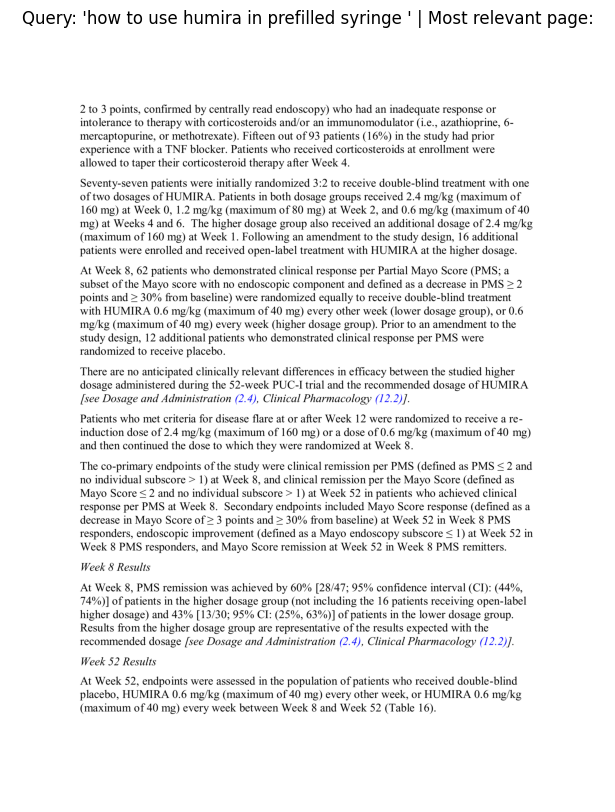

In [ ]:
import fitz

# Open PDF and load target page
pdf_path = "humira (1).pdf" # requires PDF to be downloaded
doc = fitz.open(pdf_path)
page = doc.load_page(5 + 41) # number of page (our doc starts page numbers on page 41)

# Get the image of the page
img = page.get_pixmap(dpi=300)

# Optional: save the image
#img.save("output_filename.png")
doc.close()

# Convert the Pixmap to a numpy array
img_array = np.frombuffer(img.samples_mv,
                          dtype=np.uint8).reshape((img.h, img.w, img.n))

# Display the image using Matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 10))
plt.imshow(img_array)
plt.title(f"Query: '{query}' | Most relevant page:")
plt.axis('off') # Turn off axis
plt.show()